# Data Load

In [1]:
! pip install lightgbm==3.0

     |████████████████████████████████| 1.8MB 12.0MB/s 
  Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [2]:
! pip install catboost

     |████████████████████████████████| 66.3MB 55kB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/hackerearth comp1/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/hackerearth comp1/test.csv')

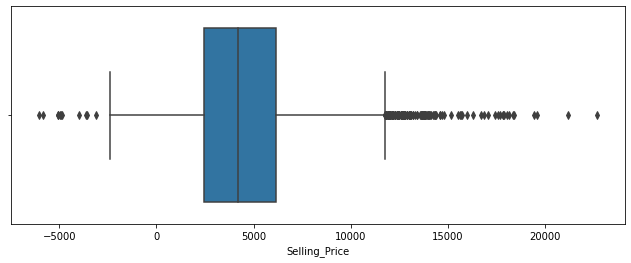

In [ ]:
fig=plt.figure(figsize=(11,4))
sns.boxplot(train_data['Selling_Price'])

In [ ]:
train_data[train_data['Selling_Price']>17500]

In [ ]:
fig=plt.figure(figsize=(11,4))
sns.boxplot(train_data['Maximum_price'])

In [ ]:
fig=plt.figure(figsize=(11,4))
sns.boxplot(train_data['Minimum_price'])

# Treating Outliers

In [5]:
train_data.drop(train_data[(train_data['Selling_Price']>17500) | (train_data['Selling_Price']<0)]['Selling_Price'].index,axis=0,inplace=True)

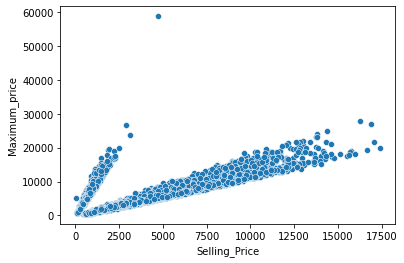

In [ ]:
sns.scatterplot(train_data['Selling_Price'],train_data['Maximum_price'])

In [6]:
train_data.drop(train_data[(train_data['Maximum_price']>23000) & (train_data['Selling_Price']<3000)].index,axis=0,inplace=True)

In [7]:
train_data.drop(train_data[(train_data['Maximum_price']>40000) & (train_data['Selling_Price']<6000)].index,axis=0,inplace=True)

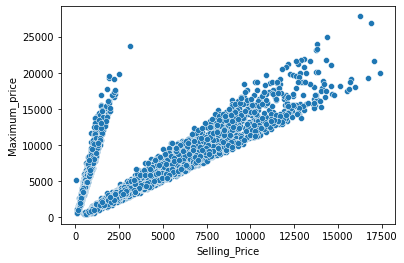

In [ ]:
sns.scatterplot(train_data['Selling_Price'],train_data['Maximum_price'])

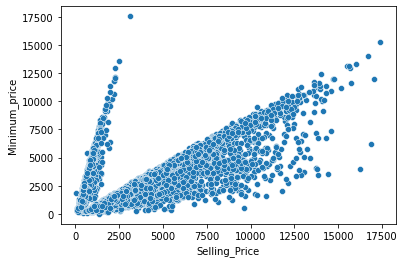

In [ ]:
sns.scatterplot(train_data['Selling_Price'],train_data['Minimum_price'])

In [8]:
train_data.drop(train_data[(train_data['Selling_Price']<55) & (train_data['Minimum_price']<4100)].index,axis=0,inplace=True)

In [9]:
train_data.drop(train_data[((train_data['Selling_Price']<10000) & (train_data['Selling_Price']>9000)) & (train_data['Minimum_price']<500)].index,inplace=True,axis=0)

In [10]:
train_data.drop(train_data[(train_data['Selling_Price']>15400) & (train_data['Minimum_price']<7000)].index,axis=0,inplace=True)

In [11]:
train_data.drop(train_data[(train_data['Selling_Price']<5000) & (train_data['Minimum_price']>17000)].index,axis=0,inplace=True)

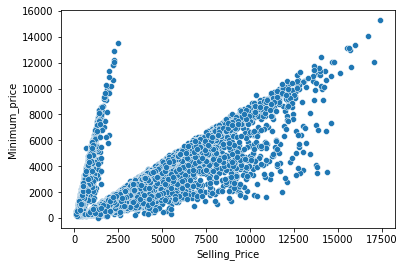

In [ ]:
sns.scatterplot(train_data['Selling_Price'],train_data['Minimum_price'])

In [12]:
train_data.shape, test_data.shape

((6334, 15), (3430, 14))

# Data Preprocessing

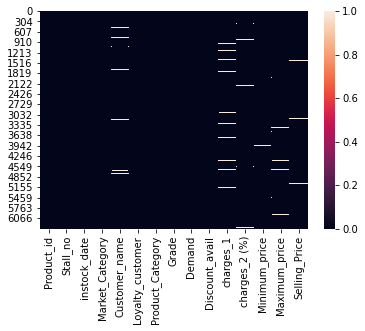

In [ ]:
sns.heatmap(pd.isnull(train_data))

In [ ]:
train_data[train_data['Discount_avail']==1]['Selling_Price'].mean()

773.5763785115727

In [13]:
###******************

def impute_selling(cols):
  a=cols[0]
  b=cols[1]
  if pd.isnull(b):
    if a==0:
      return 5171.269671542126
    else:
      return 773.57
  else:
    return b

train_data['Selling_Price']=train_data[['Discount_avail','Selling_Price']].apply(impute_selling,axis=1)

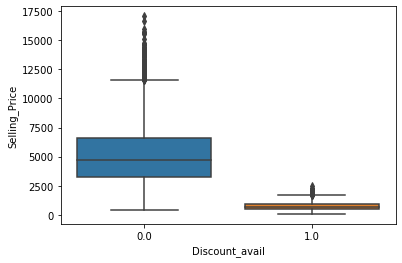

In [ ]:
sns.boxplot(train_data['Discount_avail'],train_data['Selling_Price'])

In [14]:
###**********************

def impute_discount(cols):
  dis=cols[0]
  tar=cols[1]
  if pd.isnull(dis):
    if tar>2700:
      return 0
    else:
      return 1
  else:
    return dis

train_data['Discount_avail']=train_data[['Discount_avail','Selling_Price']].apply(impute_discount,axis=1)

In [15]:
###*********************
Y=train_data['Selling_Price']

In [16]:
###***********************
total_df=pd.concat([train_data.drop('Selling_Price',axis=1),test_data],axis=0,ignore_index=True)

In [17]:
total_df.shape

(9764, 14)

In [18]:
##############*****************************
total_df['Stall_no']=total_df['Stall_no'].fillna(total_df['Stall_no'].mode())

In [19]:
## Rejecting this columns would be better 
total_df.drop('Customer_name',axis=1,inplace=True)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

### Filling Charges1 w.r.t. Charges_2

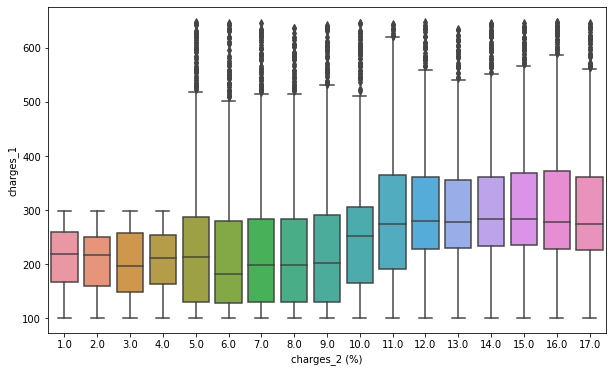

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(total_df['charges_2 (%)'],total_df['charges_1'])

In [ ]:
total_df['charges_2 (%)'].value_counts()

In [22]:
###charges1 and charges2

def impute_charges1(cols):
  ch1=cols[0]
  ch2=cols[1]
  if pd.isnull(ch1):
    return total_df[total_df['charges_2 (%)']==ch2]['charges_1'].mean()
  else:
    return ch1

total_df['charges_1']=total_df[['charges_1','charges_2 (%)']].apply(impute_charges1,axis=1)

total_df['charges_1']=total_df[['charges_1','charges_2 (%)']].apply(impute_charges1,axis=1)

def impute_charges2(cols):
  ch1=cols[0]
  ch2=cols[1]
  if pd.isnull(ch2):
    return 14.0
  else:
    return ch2

total_df['charges_2 (%)']=total_df[['charges_1','charges_2 (%)']].apply(impute_charges2,axis=1)

total_df['charges_2 (%)']=total_df['charges_2 (%)'].fillna(total_df['charges_2 (%)'].mode())

def impute_charges1(cols):
  ch1=cols[0]
  ch2=cols[1]
  if pd.isnull(ch1):
    return total_df[total_df['charges_2 (%)']==ch2]['charges_1'].mean()
  else:
    return ch1

total_df['charges_1']=total_df[['charges_1','charges_2 (%)']].apply(impute_charges1,axis=1)

### Filling Minimum and Maximum wrt Selling Price

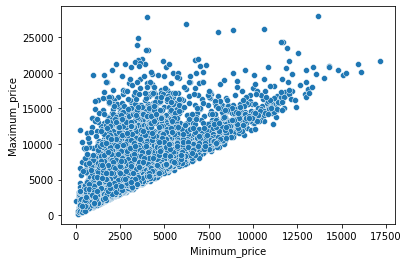

In [ ]:
sns.scatterplot(total_df['Minimum_price'],total_df['Maximum_price'])

In [ ]:
total_df[total_df['Maximum_price']<=500]['Minimum_price'].mean()

266.0416666666667

In [23]:
def min_impute(cols):
  mi=cols[0]
  ma=cols[1]
  if pd.isnull(mi):
    return total_df[total_df['Maximum_price']<=ma]['Minimum_price'].mean()
  else:
    return mi

total_df['Minimum_price']=total_df[['Minimum_price','Maximum_price']].apply(min_impute,axis=1)

total_df['Minimum_price']=total_df['Minimum_price'].fillna(total_df['Minimum_price'].median())

mini_df=total_df[['Minimum_price','Maximum_price']]
mini_df=mini_df.fillna(mini_df['Maximum_price'].mean())

from sklearn.neighbors import KNeighborsRegressor

knn_model=KNeighborsRegressor(n_neighbors=65)
knn_model.fit(np.array(mini_df['Minimum_price']).reshape(-1,1),mini_df['Maximum_price'])

def max_imputer(cols):
  min_=cols[0]
  max_=cols[1]
  if pd.isnull(max_):
    return knn_model.predict(np.array(min_).reshape(-1,1))
  else:
    return max_

total_df['Maximum_price']=total_df[['Minimum_price','Maximum_price']].apply(max_imputer,axis=1)

In [24]:
total_df['Maximum_price']=total_df['Maximum_price'].apply(lambda x: float(x))

In [25]:
loyal_cus={'Yes':1,'No ':0} # Loyalty Cust
total_df['Loyalty_customer']=total_df['Loyalty_customer'].map(loyal_cus)

In [26]:
# Product Cat
product_cat={'Pet_care':1,'Repair':2,'Child_care':3,'Cosmetics':4,'Educational':5,'Technology':6,'Hospitality':7,'Home_decor':8,'Organic':9,'Fashion':10}
total_df['Product_Category']=total_df['Product_Category'].map(product_cat) 

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9775 entries, 0 to 9774
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9775 non-null   object 
 1   Stall_no          9769 non-null   float64
 2   instock_date      9775 non-null   object 
 3   Market_Category   9775 non-null   int64  
 4   Loyalty_customer  9775 non-null   int64  
 5   Product_Category  9775 non-null   int64  
 6   Grade             9775 non-null   int64  
 7   Demand            9775 non-null   int64  
 8   Discount_avail    9775 non-null   float64
 9   charges_1         9775 non-null   float64
 10  charges_2 (%)     9775 non-null   float64
 11  Minimum_price     9775 non-null   float64
 12  Maximum_price     9775 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 992.9+ KB


In [27]:
######### HANDLING DATES ###############
total_df['instock_date'] = pd.to_datetime(total_df.instock_date, format='%Y-%m-%d')

In [28]:
total_df['instock_year'] = total_df['instock_date'].dt.year
total_df['instock_month'] = total_df['instock_date'].dt.month
total_df['instock_week'] = total_df['instock_date'].dt.week
total_df['instock_Day'] = total_df['instock_date'].dt.day
total_df['instock_hour'] = total_df['instock_date'].dt.hour
total_df['instock_minute'] = total_df['instock_date'].dt.minute
total_df['instock_dayofweek'] = total_df['instock_date'].dt.dayofweek

In [29]:
total_df['date'] = pd.DatetimeIndex(total_df.instock_date).date

In [ ]:
# Max_min Difference

In [30]:
def get_diff(cols):
  return cols[0]-cols[1]

total_df['Max_min_dif']=total_df[['Maximum_price','Minimum_price']].apply(get_diff,axis=1)

In [31]:
train_data.shape

(6334, 15)

In [32]:
X_train=total_df[0:6334]
X_test=total_df[6334:]

In [33]:
X_train.shape, X_test.shape

((6334, 22), (3430, 22))

# Feature Engineering

In [34]:
# RECENCY
import datetime as dt
today_date = dt.date(2016,3,30)

In [35]:
X_train['Recency'] = X_train.date.apply(lambda x : (today_date - x).days)
X_test['Recency'] = X_test.date.apply(lambda x : (today_date - x).days)

In [36]:
X_train=X_train.drop(['date','instock_date'],axis=1)
X_test=X_test.drop(['date','instock_date'],axis=1)

In [38]:
X_train.shape,X_test.shape

((6334, 21), (3430, 21))

In [39]:
X_train['Target']=Y

In [40]:
X_train.shape, X_test.shape

((6334, 22), (3430, 21))

# Using ProductID

In [41]:
X_train['Product_id']

0       BRAE2NF6JA5GUEXG
1       TUNE8SFB6RJN2HSD
2       BRAEAR7WZPQGPBZU
3       WATDZ2ZQ8JPDHCTJ
4       JWSEBUKYQPMBZ3RK
              ...       
6329    WATE7VE2D62VEKW8
6330    SHOEF9G8Z4ZXF6WE
6331    PBXEB9ZQ7HHCFXYG
6332    NKCEAGXHRYTNTMG7
6333    CAGE53FSAFWZRHFF
Name: Product_id, Length: 6334, dtype: object

In [42]:
def return_alps_3(id):
  return id[0:3]

def return_alps_4(id):
  return id[0:4]


In [43]:
X_train['ID_first3']=X_train['Product_id'].apply(return_alps_3)
X_train['ID_first4']=X_train['Product_id'].apply(return_alps_4)

In [44]:
X_train['ID_first3'].nunique(), X_train['ID_first4'].nunique()

(293, 322)

In [45]:
X_test['ID_first3']=X_test['Product_id'].apply(return_alps_3)
X_test['ID_first4']=X_test['Product_id'].apply(return_alps_4)

In [46]:
X_test['ID_first3'].nunique(), X_test['ID_first4'].nunique()

(243, 266)

### Feat Aggregation

In [47]:
def mean_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].mean()
    var_dict.update([(item,value)])
  return var_dict

In [48]:
def median_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].median()
    var_dict.update([(item,value)])
  return var_dict

In [49]:
def sum_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].sum()
    var_dict.update([(item,value)])
  return var_dict

In [50]:
def min_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].min()
    var_dict.update([(item,value)])
  return var_dict

In [51]:
def max_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].max()
    var_dict.update([(item,value)])
  return var_dict

In [52]:
category_feats=['ID_first3','ID_first4','Stall_no','Loyalty_customer','Product_Category','Grade','Demand','Discount_avail','instock_year','instock_month','instock_week','instock_Day','instock_hour','instock_minute','instock_dayofweek']

In [53]:
for tar in ['Target','charges_1','charges_2 (%)','Minimum_price','Maximum_price']:
  for var in category_feats:
    X_train[var+'_mean']=X_train[var].map(mean_encoder(var,tar))
    X_test[var+'_mean']=X_test[var].map(mean_encoder(var,tar))
    X_train[var+'_median']=X_train[var].map(median_encoder(var,tar))
    X_train[var+'_min']=X_train[var].map(min_encoder(var,tar))
    X_train[var+'_max']=X_train[var].map(max_encoder(var,tar))

    X_test[var+'_median']=X_test[var].map(median_encoder(var,tar))
    X_train[var+'_sum']=X_train[var].map(sum_encoder(var,tar))
    X_test[var+'_sum']=X_test[var].map(sum_encoder(var,tar))
    X_test[var+'_min']=X_test[var].map(min_encoder(var,tar))
    X_test[var+'_max']=X_test[var].map(max_encoder(var,tar))

In [54]:
X_train.shape, X_test.shape

((6334, 99), (3430, 98))

In [55]:
for col in X_train.columns:
    try:
        X_train[col].replace([np.inf,-np.inf],np.nan,inplace=True)
        X_train[col]=X_train[col].fillna(np.mean(X_train[col]))
    except:
        continue

In [56]:
for cols in X_test.columns:
    try:
        X_test[cols].replace([np.inf,-np.inf],np.nan,inplace=True)
        X_test[cols]=X_test[cols].fillna(np.mean(X_test[cols]))
    except:
        continue

In [57]:
X_train.drop(['Product_id','ID_first3','ID_first4','Target'],axis=1,inplace=True)
X_test.drop(['Product_id','ID_first3','ID_first4'],axis=1,inplace=True)

In [58]:
X_train.shape,X_test.shape

((6334, 95), (3430, 95))

# Make Metrics

In [59]:
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error

def RMSLE(y_true,y_pred):
  score=mean_squared_log_error(y_true,np.abs(y_pred))
  root_square=score**(0.5)
  return max(0,(100-root_square*100))

rmlse_score=make_scorer(RMSLE)

# Feature Selection

## Kbest

In [64]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold,KFold
from sklearn.feature_selection import SelectKBest,chi2,f_regression
kbest_model=lgb.LGBMRegressor()
kbest_cb_model=cb.CatBoostRegressor(iterations=55,verbose=0)

In [ ]:
k_nums=list(range(1,85))
scores=[]
for ks in k_nums:
  kbest = SelectKBest(f_regression, k=ks).fit_transform(X_train,Y)
  score=cross_val_score(estimator=kbest_model,X=kbest,y=Y,scoring=rmlse_score,cv=5).mean()
  scores.append(score)

Text(0, 0.5, 'RMSLE Score')

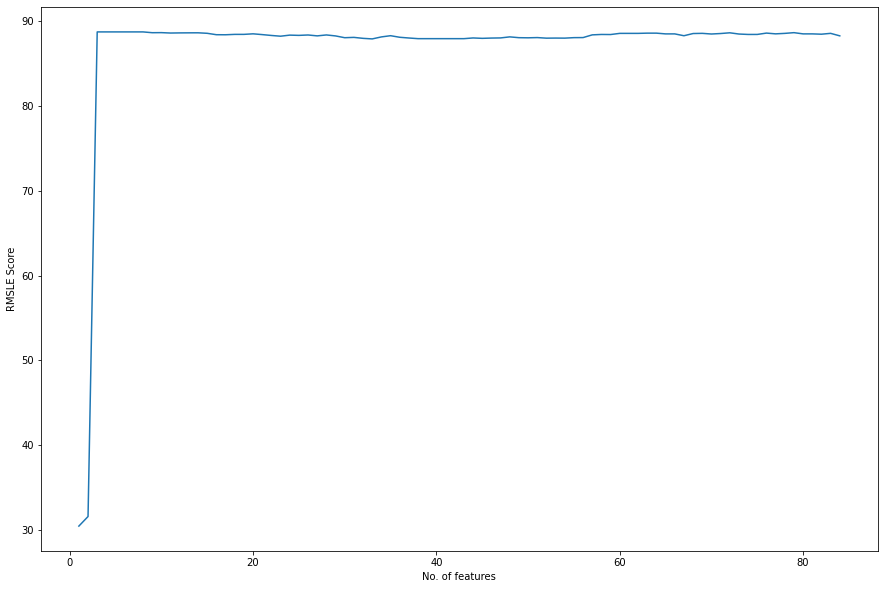

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.plot(k_nums,scores)
plt.xlabel('No. of features')
plt.ylabel('RMSLE Score')

In [ ]:
lgb_feat_selector = SelectKBest(f_regression, k=44)
lgb_feat_selector.fit(X_train, Y)
lgb_kbestcols = lgb_feat_selector.get_support(indices=True)
lgb_imp_features = X_train.iloc[:,lgb_kbestcols].columns

In [ ]:
lgb_imp_features

### Testing Kbest on Basic regression models

In [ ]:
from sklearn.linear_model import BayesianRidge, Ridge, Lasso, LassoLars

In [ ]:
models=[BayesianRidge(),Ridge(),Lasso(),LassoLars()]

In [ ]:
model_scores=[]
for model in models:
  k_nums=list(range(1,59))
  scores=[]
  for ks in k_nums:
    kbest = SelectKBest(f_regression, k=ks).fit_transform(X_train.drop('Product_id',axis=1),Y)
    score=cross_val_score(estimator=model,X=kbest,y=Y,scoring=rmlse_score,cv=5).mean()
    scores.append(score)
  model_scores.append(scores)

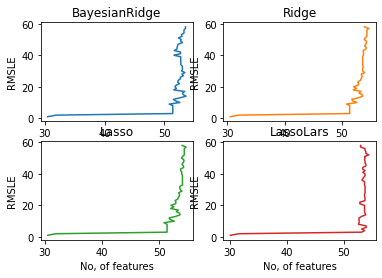

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_scores[0], k_nums,'tab:blue')
axs[0, 0].set_title('BayesianRidge')
axs[0, 1].plot(model_scores[1], k_nums, 'tab:orange')
axs[0, 1].set_title('Ridge')
axs[1, 0].plot(model_scores[2], k_nums, 'tab:green')
axs[1, 0].set_title('Lasso')
axs[1, 1].plot(model_scores[3], k_nums, 'tab:red')
axs[1, 1].set_title('LassoLars')

for ax in axs.flat:
    ax.set(xlabel='No, of features', ylabel='RMSLE')


### Random forest Kbest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
kbest_rf=RandomForestRegressor()

In [ ]:
scores=[]
for ks in k_nums:
  kbest = SelectKBest(f_regression, k=ks).fit_transform(X_train,Y)
  score=cross_val_score(estimator=kbest_rf,X=kbest,y=Y,scoring=rmlse_score,cv=5).mean()
  scores.append(score)

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.plot(k_nums,scores)
plt.xlabel('No. of features')
plt.ylabel('RMSLE Score')

## Forward Selection

### LGBM

In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [60]:
lgbm_forward_seqselector = SFS(kbest_model, scoring=rmlse_score,verbose=2, k_features=50, forward=True,cv=5)
lgbm_forward_seqselector.fit(X_train,Y,custom_feature_names=list(X_train.columns))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   24.0s finished

[2020-11-28 09:18:32] Features: 1/50 -- score: 43.98739445502249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   27.1s finished

[2020-11-28 09:18:59] Features: 2/50 -- score: 84.16579016759246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   37.4s finished

[2020-11-28 09:19:37] Features: 3/50 -- score: 89.07666737049814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LGBMRegressor(boosting_type='gbdt',
                                                  class_weight=None,
                                                  colsample_bytree=1.0,
                                                  importance_type='split',
                                                  learning_rate=0.1,
                                                  max_depth=-1,
                                                  min_child_samples=20,
                                                  min_child_weight=0.001,
                                                  min_split_gain=0.0,
                                                  n_estimators=100, n_jobs=-1,
                                                  num_leaves=31, objective=None,
                                                  random_state=None,
                                                  reg_alpha=0.0, reg_lambda=0.0,

In [61]:
lgb_forward_feats=list(lgbm_forward_seqselector.k_feature_names_)

In [62]:
lgb_forward_feats

['Loyalty_customer',
 'Demand',
 'Discount_avail',
 'charges_1',
 'Minimum_price',
 'Maximum_price',
 'instock_year',
 'instock_week',
 'instock_Day',
 'instock_hour',
 'Recency',
 'ID_first3_median',
 'ID_first4_sum',
 'Loyalty_customer_mean',
 'Loyalty_customer_median',
 'Loyalty_customer_min',
 'Loyalty_customer_max',
 'Loyalty_customer_sum',
 'Product_Category_median',
 'Product_Category_min',
 'Product_Category_sum',
 'Grade_mean',
 'Grade_median',
 'Grade_min',
 'Grade_max',
 'Grade_sum',
 'Demand_median',
 'Discount_avail_mean',
 'Discount_avail_median',
 'Discount_avail_min',
 'Discount_avail_max',
 'Discount_avail_sum',
 'instock_year_mean',
 'instock_year_median',
 'instock_year_min',
 'instock_year_max',
 'instock_year_sum',
 'instock_month_mean',
 'instock_month_median',
 'instock_month_sum',
 'instock_week_sum',
 'instock_Day_mean',
 'instock_Day_median',
 'instock_Day_min',
 'instock_Day_sum',
 'instock_hour_mean',
 'instock_hour_median',
 'instock_dayofweek_median',
 'in

In [63]:
lgb_forward_featses=lgb_forward_feats[0:44]

In [60]:
lgb_forward_featses=['Loyalty_customer',
 'Demand',
 'Discount_avail',
 'charges_1',
 'Minimum_price',
 'Maximum_price',
 'instock_year',
 'instock_week',
 'instock_Day',
 'instock_hour',
 'Recency',
 'ID_first3_median',
 'ID_first4_sum',
 'Loyalty_customer_mean',
 'Loyalty_customer_median',
 'Loyalty_customer_min',
 'Loyalty_customer_max',
 'Loyalty_customer_sum',
 'Product_Category_median',
 'Product_Category_min',
 'Product_Category_sum',
 'Grade_mean',
 'Grade_median',
 'Grade_min',
 'Grade_max',
 'Grade_sum',
 'Demand_median',
 'Discount_avail_mean',
 'Discount_avail_median',
 'Discount_avail_min',
 'Discount_avail_max',
 'Discount_avail_sum',
 'instock_year_mean',
 'instock_year_median',
 'instock_year_min',
 'instock_year_max',
 'instock_year_sum',
 'instock_month_mean',
 'instock_month_median',
 'instock_month_sum',
 'instock_week_sum',
 'instock_Day_mean',
 'instock_Day_median',
 'instock_Day_min']

### CatBoost

In [99]:
cb_forward_seqselector = SFS(kbest_cb_model, scoring=rmlse_score,verbose=2, k_features=50, forward=True,cv=5)
cb_forward_seqselector.fit(X_train,Y,custom_feature_names=list(X_train.columns))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   46.0s finished

[2020-11-28 17:10:37] Features: 1/50 -- score: 43.987736595742305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   49.9s finished

[2020-11-28 17:11:27] Features: 2/50 -- score: 84.20995518220684[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   59.2s finished

[2020-11-28 17:12:26] Features: 3/50 -- score: 87.41703779616763[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=<catboost.core.CatBoostRegressor object at 0x7f031d720e48>,
                          floating=False, forward=True, k_features=50, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring=make_scorer(RMSLE),
                          verbose=2)

In [100]:
cb_forward_feats=list(cb_forward_seqselector.k_feature_names_)

In [101]:
cb_forward_feats=cb_forward_feats[0:4]

In [102]:
cb_forward_feats

['Stall_no', 'Product_Category', 'Discount_avail', 'Minimum_price']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model_test=LinearRegression()

In [ ]:
seqselector = SFS(lr_model_test, scoring=rmlse_score,verbose=2, k_features=50, forward=True,cv=4)
seqselector.fit(X_train.drop('Target',axis=1),Y,custom_feature_names=list(X_train.drop('Target',axis=1).columns))
seq_score=seqselector.k_score_

# GridSearch + LGBM

In [69]:
cv_6 = RepeatedKFold(n_splits=6, n_repeats=1, random_state=10)
e=2.7182818284590452353602874713527

In [75]:
lgb_params={'num_leaves':[23,24,25,26,27,28,29,31],'max_depth':[5,6,7],'learning_rate':np.linspace(0.07,0.09,20)}

In [76]:
lgb_grid=GridSearchCV(estimator=lgb.LGBMRegressor(),param_grid=lgb_params,scoring=rmlse_score,cv=cv_6,verbose=2)

In [77]:
lgb_grid.fit(X_train[lgb_forward_featses],Y)

Fitting 6 folds for each of 480 candidates, totalling 2880 fits
[CV] learning_rate=0.07, max_depth=5, num_leaves=23 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... learning_rate=0.07, max_depth=5, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07, max_depth=5, num_leaves=23 ..................
[CV] ... learning_rate=0.07, max_depth=5, num_leaves=23, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  learning_rate=0.07315789473684212, max_depth=6, num_leaves=31, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.07315789473684212, max_depth=7, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.07315789473684212, max_depth=7, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.07315789473684212, max_depth=7, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.07315789473684212, max_depth=7, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.07315789473684212, max_depth=7, num_leaves=23, total=   0.2s
[CV] learning_rate=0.07315789473684212, max_depth=7, num_leaves=23 ...
[CV]  learning_rate=0.073

[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 10.7min finished


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=6, random_state=10),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random...
             param_grid={'learning_rate': array([0.07      , 0.07105263, 0.07210526, 0.07315789, 0.07421053,
       0.07526316, 0.07631579, 0.07736842, 0.07842105, 0.07947368,
       0.08052632, 0.08157895, 0.08263158, 0.08368421, 0.08473684,
       0.08578947, 0.08684211, 0.08789474, 0.08894737, 0.09      ]),
                         'max_depth': [5, 6, 7],
                    

In [78]:
lgb_grid.best_score_

90.24189583593922

In [80]:
lgb_grid.best_params_

{'learning_rate': 0.08263157894736842, 'max_depth': 7, 'num_leaves': 31}

In [81]:
lgb_model=lgb.LGBMRegressor(num_leaves=31,max_depth=7,learning_rate=0.08263157894736842,loss_function='RMSLE')

In [83]:
lgb_model.fit(X_train[lgb_forward_featses],np.log1p(Y)) #np.log1p(Y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.08263157894736842,
              loss_function='RMSLE', max_depth=7, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [84]:
lgb_pred=lgb_model.predict(X_test[lgb_forward_featses])

In [91]:
lgb_pred*1.001

array([8.10803099, 7.58884688, 9.37461463, ..., 8.75433564, 8.14812587,
       6.92553176])

In [94]:
lgb_pred_df=pd.DataFrame({'Product_id':test_data['Product_id'],'Selling_Price':((e**lgb_pred)*1.001)})

In [95]:
lgb_pred_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3297.535201
1,ACCEGCATKHNRXUHW,1963.070520
2,NKCE6GJ5XVJDXNNZ,11687.192668
3,NKCEB8BK3ZXDHDHM,9833.628039
4,TOPEFDXSAHRNPF94,5687.626156


In [96]:
lgb_pred_df.to_csv('lgb51.csv',index=False)

# GridsearchCV+Catboost

In [103]:
cb_params={'iterations':[45,46,48,50,52,54,56,58,60,62],'depth':[4,5,6],'learning_rate':np.linspace(0.05,0.15,12),'verbose':[0]}

In [105]:
cb_grid=GridSearchCV(estimator=cb.CatBoostRegressor(),param_grid=cb_params,scoring=rmlse_score,cv=cv_6,verbose=2)

In [106]:
cb_grid.fit(X_train[cb_forward_feats],Y)

Fitting 6 folds for each of 360 candidates, totalling 2160 fits
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........
[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........
[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........
[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........
[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.05, verbose=0 ...........
[CV]  depth=4, iterations=45, learning_rate=0.05, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0 
[CV]  depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0 
[CV]  depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0, total=   0.1s
[CV] depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0 
[CV]  depth=4, iterations=45, learning_rate=0.0590909090909091, verbose=0, total=   0.1

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  4.1min finished


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=6, random_state=10),
             error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f031c6155f8>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [4, 5, 6],
                         'iterations': [45, 46, 48, 50, 52, 54, 56, 58, 60, 62],
                         'learning_rate': array([0.05      , 0.05909091, 0.06818182, 0.07727273, 0.08636364,
       0.09545455, 0.10454545, 0.11363636, 0.12272727, 0.13181818,
       0.14090909, 0.15      ]),
                         'verbose': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(RMSLE), verbose=2)

In [107]:
cb_grid.best_score_

73.41193971841916

In [108]:
cb_grid.best_params_

{'depth': 4,
 'iterations': 62,
 'learning_rate': 0.14090909090909093,
 'verbose': 0}

In [ ]:
import catboost as cb

In [ ]:
cb_model=cb.CatBoostRegressor(iterations=64,depth=5,learning_rate=0.11363636363636363,eval_metric='MSLE')

In [ ]:
cb_model.fit(X_train[cb_forward_feats],np.log1p(Y))

0:	learn: 0.0080842	total: 2.19ms	remaining: 138ms
1:	learn: 0.0066361	total: 4.21ms	remaining: 130ms
2:	learn: 0.0054032	total: 6.02ms	remaining: 122ms
3:	learn: 0.0044075	total: 7.73ms	remaining: 116ms
4:	learn: 0.0036023	total: 10ms	remaining: 118ms
5:	learn: 0.0029858	total: 12.3ms	remaining: 119ms
6:	learn: 0.0024590	total: 15ms	remaining: 122ms
7:	learn: 0.0020261	total: 16.8ms	remaining: 118ms
8:	learn: 0.0016742	total: 18.5ms	remaining: 113ms
9:	learn: 0.0013881	total: 20.3ms	remaining: 110ms
10:	learn: 0.0011542	total: 22ms	remaining: 106ms
11:	learn: 0.0009745	total: 23.7ms	remaining: 103ms
12:	learn: 0.0008267	total: 25.5ms	remaining: 100ms
13:	learn: 0.0007013	total: 27.3ms	remaining: 97.4ms
14:	learn: 0.0006002	total: 28.9ms	remaining: 94.5ms
15:	learn: 0.0005166	total: 30.6ms	remaining: 91.8ms
16:	learn: 0.0004493	total: 32.4ms	remaining: 89.7ms
17:	learn: 0.0003968	total: 34.3ms	remaining: 87.6ms
18:	learn: 0.0003514	total: 36.1ms	remaining: 85.4ms
19:	learn: 0.0003170	t

In [ ]:
cb_preds=cb_model.predict(X_test[cb_forward_feats])

In [ ]:
cb_pred_df=pd.DataFrame({'Product_id':test_data['Product_id'],'Selling_Price':e**cb_preds})

In [ ]:
cb_pred_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3189.123737
1,ACCEGCATKHNRXUHW,1752.532081
2,NKCE6GJ5XVJDXNNZ,11556.899327
3,NKCEB8BK3ZXDHDHM,9831.559143
4,TOPEFDXSAHRNPF94,5452.062596


In [ ]:
cb_pred_df.to_csv('cb4.csv',index=False)

# High Score Submission details

In [ ]:
sub_dict={
    'Model_name':['LGBM','LGBM'],
    'Feature Selection Type':['kbest','Forward Selection'],
    'Num_feats_selected':[43,6],
    'Learning Rate':[0.07421052631578948,0.08777777857142857],
    'Num_leaves(lgbm)':[49,26],
    'Max_depth(lgbm)':[12,6],
    'GridSearchScore':[89.48,89.75],
    'LeaderBoardScore(with log)':[89.54,89.79]
}

In [ ]:
Submissions_df=pd.DataFrame(sub_dict)

In [ ]:
Submissions_df

,Model_name,Feature Selection Type,Num_feats_selected,Learning Rate,Num_leaves(lgbm),Max_depth(lgbm),GridSearchScore,LeaderBoardScore(with log)
0,LGBM,kbest,43,0.074211,49,12,89.48,89.54
1,LGBM,Forward Selection,6,0.087778,26,6,89.75,89.79


# Stacking

In [ ]:
stk_pred=0.7*lgb_pred+0.3*cb_preds

In [ ]:
stk_pred

array([8.07816966, 7.51674743, 9.34049298, ..., 8.72540643, 8.18559671,
       6.90354426])

In [ ]:
stk_pred_df=pd.DataFrame({'Product_id':test_data['Product_id'],'Selling_Price':e**stk_pred})

In [ ]:
stk_pred_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3223.328062
1,ACCEGCATKHNRXUHW,1838.577463
2,NKCE6GJ5XVJDXNNZ,11390.021930
3,NKCEB8BK3ZXDHDHM,9627.591116
4,TOPEFDXSAHRNPF94,5493.479983


In [ ]:
stk_pred_df.to_csv('stk_pred14.csv',index=False)

# Total Data Predict

In [ ]:
X_train_virtu=X_train.copy()
X_test_virtu=X_test.copy()

In [ ]:
X_train_virtu['Target']=Y
X_test_virtu['Target']=e**lgb_pred

In [ ]:
X_train_virtu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product_id                6350 non-null   object 
 1   Stall_no                  6350 non-null   float64
 2   Market_Category           6350 non-null   int64  
 3   Loyalty_customer          6350 non-null   int64  
 4   Product_Category          6350 non-null   int64  
 5   Grade                     6350 non-null   int64  
 6   Demand                    6350 non-null   int64  
 7   Discount_avail            6350 non-null   float64
 8   charges_1                 6350 non-null   float64
 9   charges_2 (%)             6350 non-null   float64
 10  Minimum_price             6350 non-null   float64
 11  Maximum_price             6350 non-null   float64
 12  instock_year              6350 non-null   int64  
 13  instock_month             6350 non-null   int64  
 14  instock_

In [ ]:
X_train_virtu.shape, X_test_virtu.shape

((6350, 86), (3430, 86))

In [ ]:
total_virtu_df=pd.concat([X_train_virtu,X_test_virtu],axis=0)

In [ ]:
total_virtu_df.shape

(9780, 86)

In [ ]:
total_virtu_df.info()

In [ ]:
total_virtu_df['Target']=total_virtu_df['Target'].fillna(total_virtu_df['Target'].mean())

In [ ]:
total_lgb_params={'num_leaves':[30,31,32,33,34],'max_depth':[5,6,7,8,9],'learning_rate':np.linspace(0.06,0.12,15)}

In [ ]:
total_lgb_grid=GridSearchCV(estimator=lgb.LGBMRegressor(),param_grid=total_lgb_params,scoring=rmlse_score,cv=cv_5,verbose=2)

In [ ]:
total_lgb_grid.fit(total_virtu_df[lgb_forward_feats],total_virtu_df['Target'])

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
[CV] learning_rate=0.06, max_depth=5, num_leaves=30 ..................
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=30, total=   0.1s
[CV] learning_rate=0.06, max_depth=5, num_leaves=30 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... learning_rate=0.06, max_depth=5, num_leaves=30, total=   0.1s
[CV] learning_rate=0.06, max_depth=5, num_leaves=30 ..................
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=30, total=   0.1s
[CV] learning_rate=0.06, max_depth=5, num_leaves=30 ..................
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=30, total=   0.1s
[CV] learning_rate=0.06, max_depth=5, num_leaves=30 ..................
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=30, total=   0.2s
[CV] learning_rate=0.06, max_depth=5, num_leaves=31 ..................
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=31, total=   0.1s
[CV] learning_rate=0.06, max_depth=5, num_leaves=31 ..................
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[CV] ... learning_rate=0.06, max_depth=5, num_leaves=31, total=   0.1s
[CV] learning_r

[Parallel(n_jobs=1)]: Done 1875 out of 1875 | elapsed:  4.9min finished


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=10),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random...
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': array([0.06      , 0.06428571, 0.06857143, 0.07285714, 0.07714286,
       0.08142857, 0.08571429, 0.09      , 0.09428571, 0.09857143,
       0.10285714, 0.10714286, 0.11142857, 0.11571429, 0.12      ]),
                         'max_depth': [5, 6, 7, 8, 9],
                         'num_leaves'

In [ ]:
total_lgb_grid.best_score_

14.39838789596065

In [ ]:
total_lgb_grid.best_params_

{'learning_rate': 0.06428571428571428, 'max_depth': 5, 'num_leaves': 31}

# Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=knn_params,cv=10,verbose=2,scoring=rmlse_score)

In [ ]:
knn_grid.fit(X_train[['Maximum_price','Minimum_price']],Y)

Fitting 10 folds for each of 38 candidates, totalling 380 fits
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    3.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(RMSLE), verbose=2)

In [ ]:
knn_grid.best_score_

32.00124511844844